## RMM2

In [7]:
!pwd

/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/deep_CNN


In [8]:
import numpy as np
import pandas as pd

In [9]:
import xarray as xr
import hilbert_data1_jgrjd_20CRV3
import datetime
import matplotlib.pyplot as plt

In [10]:
df = xr.open_dataset('trop_sfc.ano_1905-2015_filtered_rm_mean120.2deg.nc')

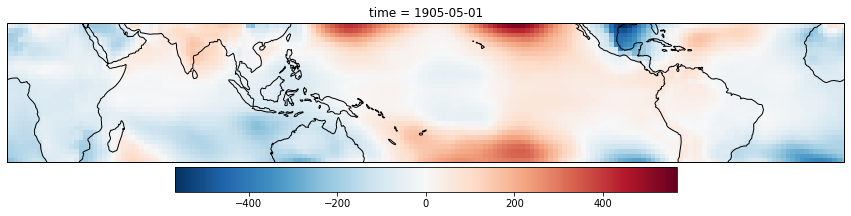

In [17]:
import cartopy.crs as ccrs
import cartopy

fig, ax = plt.subplots(8,1,figsize=(15,8))

ax1 = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180.0))
im=df.pres_ano[0].plot(ax=ax1,transform = ccrs.PlateCarree(),add_colorbar= False)
ax1.coastlines() 

fig.colorbar(im, ax=ax1,orientation="horizontal",fraction=0.07,anchor=(0.5,-1.0),shrink=0.60,pad=0.01)
plt.savefig('cnn2d_image.png',dpi=1200)

In [12]:
_,_,y_train = hilbert_data1_jgrjd_20CRV3.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
_,_,y_test = hilbert_data1_jgrjd_20CRV3.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))

In [13]:
y_test.index[0],y_train.index[-1]

(Timestamp('1974-09-28 00:00:00'), Timestamp('2008-12-31 00:00:00'))

In [14]:
df_train = df.sel(time=slice(str(y_train.index[0]),str(y_train.index[-1])),lat=slice(-25,25))
df_test = df.sel(time=slice(str(y_test.index[0]),str(y_test.index[-1])),lat=slice(-25,25))
df_test3 = df.sel(lat=slice(-25,25))


In [ ]:
x_train = df_train.pres_ano.values[:,:,:]
x_test  = df_test.pres_ano.values[:,:,:]
x_test3 = df_test3.pres_ano.values[:,:,:]

In [ ]:
ff = x_train.flatten()

In [ ]:
plt.hist(ff,bins=35)

In [ ]:
df

In [ ]:
y_train.index[0],y_train.index[-1]

In [ ]:
df.pres_ano[27027,1,10],df.pres_ano[37865,1,10]

In [ ]:
y_test.index[0],y_test.index[-1]

In [ ]:
df.pres_ano[25352,1,10],df.pres_ano[26617,1,10]

In [ ]:
x_train.shape,x_test3.shape,x_test.shape

In [ ]:
x_test3_ = x_test3.copy()
x_test3_ = x_test3_.reshape(x_test3_.shape[0],x_test3_.shape[1]*x_test3_.shape[2])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
xtest3 = x_test3.copy()
#xtrain  = 
scalers = {}
for i in range(xtest3.shape[0]):
    scalers = MinMaxScaler()
    ff = xtest3[i,:,:].reshape(26*180,1)
    scalers.fit(ff)
    xtest3[i,:,:] = np.reshape(scalers.fit_transform(ff),(26,180))
    #xtrain[i,:,:] = scalers[i].fit_transform(xtrain[:, i, :]) 

#for i in range(xtest.shape[1]):
#    xtest[:, i, :] = scalers[i].transform(xtest[:, i, :]) 

In [ ]:
plt.hist(xtest3.flatten(),bins=35)

In [ ]:
xtrain = xtest3[27027:37866,:,:,None]
xtest  = xtest3[25352:26618,:,:,None]
xtest3 = xtest3[:,:,:,None]

In [ ]:
xtrain.shape,xtest.shape,y_train.shape,y_test.shape

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,AveragePooling2D

model = Sequential()

model.add(Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=(xtrain.shape[1],xtrain.shape[2],1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=1, activation = 'linear'))

xtrain.shape,y_train.shape

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mae')

history = model.fit(xtrain, y_train.values, validation_data=(xtest, y_test.values), epochs=3)

In [ ]:
batch_size = 32
#num_classes = 10
epochs = 60
data_augmentation = True

In [6]:
import keras
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


model = Sequential()
model.add(Conv2D(64*2, (3, 3), padding='same',
                 input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64*2, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64*2, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('linear'))

# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='mae',optimizer=opt)

Using TensorFlow backend.


NameError: name 'xtrain' is not defined

In [ ]:
model.summary()

In [ ]:
xtrain1 = xtrain.astype('float32')
xtest1 = xtest.astype('float32')
xtest3 = xtest3.astype('float32')

ytrain1 = y_train.values.astype('float32')
ytest1  = y_test.values.astype('float32')

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(xtrain1, ytrain1,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(xtest1, ytest1),
              shuffle=False)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(xtrain1)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(xtrain1, ytrain1,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(xtest1, ytest1),
                        workers=4)

In [ ]:
#model.history.keys()

plt.plot(model.history.history['loss'],'-*',label ='train')
plt.plot(model.history.history['val_loss'],'-*',label ='test')
plt.ylabel('MAE')
plt.xlabel('No of Epochs')
plt.legend()
# plt.savefig('RMM2_history.png')

## Correlation

In [ ]:
yy_test = model.predict(xtest)

In [ ]:
yy_test.shape,y_test.shape

In [ ]:
plt.plot(yy_test,y_test,'+')

In [ ]:
yy_test = model.predict(xtest)
test_corr = np.corrcoef(yy_test[:,0],y_test.values[:,0])[0,1]
yy_test   = yy_test[:,0]/yy_test[:,0].std()

# print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test,y_test.values[:,0],'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.values[:,0],bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [ ]:
yy_train = model.predict(xtrain)
train_corr = np.corrcoef(yy_train[:,0],y_train.values[:,0])[0,1]
yy_train   = yy_train[:,0]/yy_train[:,0].std()

# print("train shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train,y_train.values[:,0],'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.values[:,0],bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [ ]:
rmm2 = model.predict(xtest3)

In [ ]:
rmm2 = pd.DataFrame(rmm2,index=pd.to_datetime(df_test3.time[:].values),columns=['rmm2'])

In [ ]:
plt.hist(rmm2.rmm2,bins=35)

In [ ]:
#rmm2.to_csv('rmm2_conv_minmaxscale_1905_2015.csv')

In [ ]:
plt.plot(rmm2.rmm2)
plt.axhline(3)
plt.axhline(-3)